In [4]:
pip install pandas numpy seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Rithi Arul\AppData\Local\Temp\ipykernel_18108\3682040810.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")


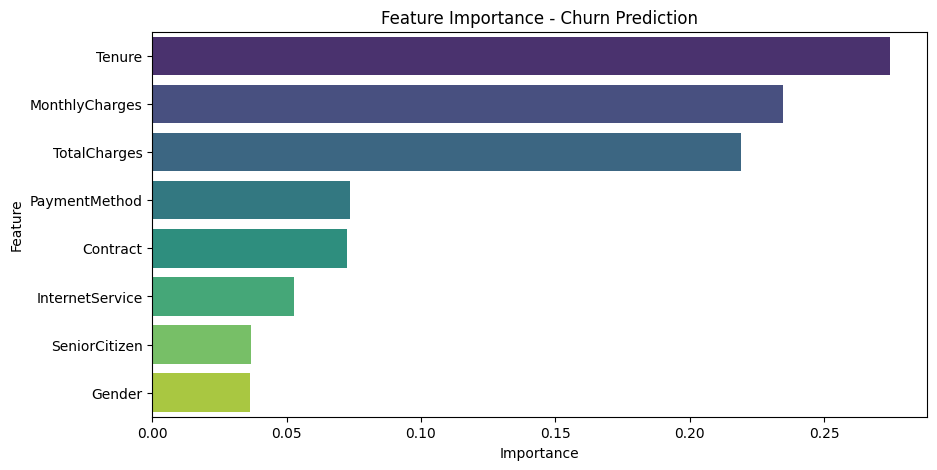


💡 High Churn Risk Groups Analysis:
High Monthly Charges:
Churn
0    29
1    21
Name: count, dtype: int64

Month-to-Month Contracts:
Churn
0    41
1    22
Name: count, dtype: int64

Senior Citizens:
Churn
0    74
1    27
Name: count, dtype: int64


📢 Recommended Retention Strategies:
🛠 High Monthly Charges: Offer loyalty discounts, introduce budget-friendly plans, and provide better service packages.
🛠 Month-to-Month Contracts: Encourage long-term contracts with discounts or perks (e.g., free upgrades, exclusive content).
🛠 Senior Citizens: Provide personalized customer support, introduce senior-friendly plans, and ensure easy-to-use interfaces.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# 🎯 Creating a Sample Customer Churn Dataset
np.random.seed(42)
data = {
    "CustomerID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "SeniorCitizen": np.random.choice([0, 1], 200),  # 0 = Not senior, 1 = Senior
    "Tenure": np.random.randint(1, 72, 200),  # Customer tenure in months
    "MonthlyCharges": np.random.uniform(20, 120, 200),  # Monthly bill amount
    "TotalCharges": np.random.uniform(100, 6000, 200),  # Total money spent
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], 200),
    "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"], 200),
    "InternetService": np.random.choice(["DSL", "Fiber optic", "No"], 200),
    "Churn": np.random.choice(["Yes", "No"], 200, p=[0.3, 0.7])  # 30% churn rate
}

# Convert to DataFrame
df = pd.DataFrame(data)

# 🔢 Encode categorical variables
label_encoders = {}
for col in ["Gender", "Contract", "PaymentMethod", "InternetService", "Churn"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode categorical features
    label_encoders[col] = le

# 🎯 Define Features and Target
X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]

# 🚀 Train a Random Forest Model to Identify Important Features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# 📈 Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.title("Feature Importance - Churn Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 📊 Identifying High Churn Risk Groups
high_risk_groups = {
    "High Monthly Charges": df[df["MonthlyCharges"] > df["MonthlyCharges"].quantile(0.75)]["Churn"].value_counts(),
    "Month-to-Month Contracts": df[df["Contract"] == 0]["Churn"].value_counts(),  # 0 = Month-to-month (encoded)
    "Senior Citizens": df[df["SeniorCitizen"] == 1]["Churn"].value_counts(),
}

print("\n💡 High Churn Risk Groups Analysis:")
for key, value in high_risk_groups.items():
    print(f"{key}:\n{value}\n")

# 📌 Generating Retention Strategies
retention_strategies = {
    "High Monthly Charges": "Offer loyalty discounts, introduce budget-friendly plans, and provide better service packages.",
    "Month-to-Month Contracts": "Encourage long-term contracts with discounts or perks (e.g., free upgrades, exclusive content).",
    "Senior Citizens": "Provide personalized customer support, introduce senior-friendly plans, and ensure easy-to-use interfaces.",
}

print("\n📢 Recommended Retention Strategies:")
for key, strategy in retention_strategies.items():
    print(f"🛠 {key}: {strategy}")


In [5]:
pip install pandas numpy seaborn matplotlib scikit-learn



SyntaxError: invalid syntax (1133618091.py, line 1)

In [ ]:
# Customer Retention Strategy Generator Based on Churn Indicators

import pandas as pd

# Load segmented customer data (replace 'segmented_customers_with_churn_indicators.csv' with your file)
df = pd.read_csv('segmented_customers_with_churn_indicators.csv')

# Define retention strategies based on segment characteristics
def suggest_retention_ideas(segment_data):
    insights = []
    avg_churn_risk = segment_data['Churn_Risk_Score'].mean()

    if avg_churn_risk > 7:
        insights.append("High churn risk: Offer personalized discounts and proactive customer support.")
    elif 4 <= avg_churn_risk <= 7:
        insights.append("Moderate churn risk: Engage customers with loyalty programs and targeted offers.")
    else:
        insights.append("Low churn risk: Maintain engagement through consistent value delivery and positive experiences.")

    if segment_data['Usage_Frequency'].mean() < 5:
        insights.append("Low usage frequency: Provide product tutorials and usage incentives.")
    elif segment_data['Usage_Frequency'].mean() > 15:
        insights.append("High usage frequency: Upsell premium plans or additional services.")

    if segment_data['Annual_Income'].mean() < 30000:
        insights.append("Budget-conscious segment: Offer cost-effective solutions and flexible pricing.")
    else:
        insights.append("Higher-income segment: Highlight premium features and exclusive services.")

    return insights

# Generate retention ideas for each customer segment
retention_ideas = {}
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]
    retention_ideas[f'Segment {segment}'] = suggest_retention_ideas(segment_data)

# Save actionable insights to a text file
with open('retention_insights.txt', 'w') as file:
    for segment, insights in retention_ideas.items():
        file.write(segment + ":\n")
        for insight in insights:
            file.write(f"- {insight}\n")
        file.write("\n")

# Display actionable insights
for segment, insights in retention_ideas.items():
    print(segment + ":")
    for insight in insights:
        print(f"- {insight}")
    print()


FileNotFoundError: [Errno 2] No such file or directory: 'segmented_customers_with_churn_indicators.csv'